In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
from scipy.optimize import linprog
import cvxpy as cvx

## Problem 1 
### Using Linprog

### Using cvxp

In [54]:
x = cvx.Variable(2)
r = cvx.Variable()

A = np.array( [[0, -1], [2, -1], [1, 1], [-1/3, 1], [-1, 0], [-1, -1]] )
b = np.array( [0.0, 7.0, 7.0, 3.0, 0.0, -1.0] )
A2 = np.array( [[0, -1], [2, -1], [1, 1], [-1/3, 1], [-1, 0], [-1, -1]] )
b2 = np.array( [0.0, 7.0, 7.0, 3.0, 0.0, -1.0] )
#here we want to do floating division 

for i in range(len(b)):
    b[i] = b[i]/la.norm(A[i])
    A[i] = A[i]/la.norm(A[i])

In [55]:
def radius(x):
    r = -(A@x -b)
    for i,a in enumerate(A):
        r[i] = r[i]
    return r

In [56]:
def radius_obj(x):
    r = -(A@x -b)
    return cvx.min(r)

In [57]:
def constraints_(x):
    c = []
    a = A@x
    for i,a_ in enumerate(a):
        c.append(a_ <= b[i])
    return c

In [58]:
obj = cvx.Maximize(radius_obj(x))
constraints = constraints_(x)
prob = cvx.Problem(obj, constraints)
prob.solve()
print(x.value)

[2.36060918 1.84357308]


(-2, 5)

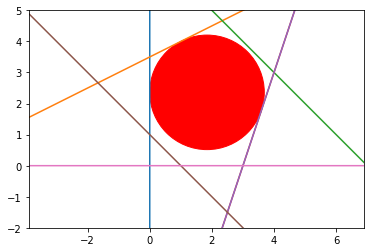

In [59]:
a = np.linspace(-5,10,10000)

fig, ax = plt.subplots()
for i in range(len(b)):
    if A[i][1] != 0:
        y = -(A[i][0]*a -b[i])/(A[i][1])
    ax.plot(y, a)
ax.plot(a, a*0)
ax.axis('equal')
circle=plt.Circle((x.value[1],x.value[0]), min(radius(x.value)), color='r')
ax.add_artist(circle)
ax.set_xlim([-2,5])
ax.set_ylim([-2,5])

In [60]:
for c in constraints:
    print(c.dual_value)

0.0
0.0
0.0
0.0
0.0
0.0


In [62]:
r.value

# Problem 2

In [8]:
c = [2,5,3,7,1]
A =  [[1,0,-1,-1,0],[0,1,1,0,-1],[1,1,0,0,0],[0,0,0,1,1]]
b=  [0,0,4,4]
x1 = [0,5]
x2 = [0,2]
x3 = [0,1]
x4 = [0,2]
x5 = [0,4]
res = linprog(c, A_eq=A, b_eq = b,bounds = [x1,x2,x3,x4,x5], options={"disp": True})

Optimization terminated successfully.
         Current function value: 27.000000   
         Iterations: 6


In [9]:
print(res)

     fun: 27.0
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([3., 0., 0., 1., 1.])
  status: 0
 success: True
       x: array([2., 2., 1., 1., 3.])
